## 11.5 Homework

#### 1, Monte Carlo Integral

Calculate the area shaded in green
![Homework](https://raw.githubusercontent.com/qzhu2017/2017-cmp/master/img/MC1.png)

#### 2, Error Analysis
Try to do the intergral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and calculate its standard variance.

### 1. Monte Carlo integral

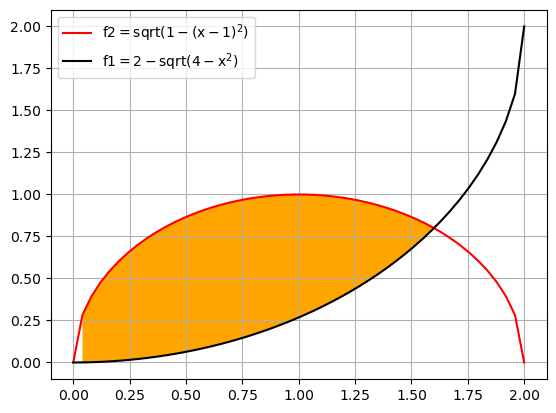

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

#define funcs for semicircles
f1 = lambda x: 2-np.sqrt(4-(x**2))
f2 = lambda x: np.sqrt(1-(x-1)**2)

#plotting the functions
x = np.linspace(0,2)
y2 = f2(x)
plt.plot(x, y2, color='red', label='$\mathregular{f2 = sqrt(1-(x-1)^{2})}$')

y1 = f1(x)
plt.plot(x, y1, color='black', label='$\mathregular{f1 = 2-sqrt(4-x^{2})}$')

plt.fill_between(x, y1, y2, where=y1<y2, facecolor='orange')
plt.legend()
plt.grid()
plt.show()

Before we can continue with the Monte Carlo integration, we must find a way to figure out the area of the intersection. I settled on a rectangle of the maximum length and width of the intersection. Below is a code to figure out the points where the circles intersect. It is taken from https://stackoverflow.com/questions/55816902/finding-the-intersection-of-two-circles, the top-most voted answer.

In [4]:
#detour to find the points where the circles intersect
def get_intersections(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=np.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)
    
get_intersections(0,2,2,1,0,1)

(-2.220446049250313e-16, 5.551115123125783e-17, 1.6, 0.8000000000000003)

The above code gives us that the right-most point is (1.6, 0.8). The rectangle is 1.6 units long on the x-axis and 1 unit long on the y-axis.

In [6]:
#monte carlo function
def MC(N):
    count = 0
    for i in range(N):
        x = 1.6*random()
        y = random()
        if y>f1(x) and y<f2(x):
            count += 1
    I = float(1.6*count/N)
    return I
    
for N in [100, 1000, 10000, 100000]:
    print('N =', N)
    print('I =', MC(N))
    print('')

N = 100
I = 0.8640000000000001

N = 1000
I = 0.9728000000000001

N = 10000
I = 0.9624

N = 100000
I = 0.964176



### 2. Error analysis

In [8]:
#function to calculate MC integration, variance, and standard deviation
def var(N,I):
    p = I/1.6
    return N*p*(1-p)
    
def std(N,I):
    p = I/1.6
    return np.sqrt((p*(1-p))/N)

N1 = 100
N2 = 1000
N3 = 10000
N4 = 100000

res1 = []
res2 = []
res3 = []
res4 = []

for i in range(100):
    res1.append(MC(N1))
    res2.append(MC(N2))
    res3.append(MC(N3))
    res4.append(MC(N4))